# Task 1 - EMPLOYEE TURNOVER PREDICTION

Use a dataset of employee information and build a model that can predict which employees are most likely to leave the company.

Importing libraries and dataset

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
import mpl_toolkits
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
emp=pd.read_csv('WA_Fn-UseC_-HR-Employee-Attrition.csv')

In [3]:
emp.head(10)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
5,32,No,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,1,8,...,3,80,0,8,2,2,7,7,3,6
6,59,No,Travel_Rarely,1324,Research & Development,3,3,Medical,1,10,...,1,80,3,12,3,2,1,0,0,0
7,30,No,Travel_Rarely,1358,Research & Development,24,1,Life Sciences,1,11,...,2,80,1,1,2,3,1,0,0,0
8,38,No,Travel_Frequently,216,Research & Development,23,3,Life Sciences,1,12,...,2,80,0,10,2,3,9,7,1,8
9,36,No,Travel_Rarely,1299,Research & Development,27,3,Medical,1,13,...,2,80,2,17,3,2,7,7,7,7


In [4]:
emp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

Filling missing values

In [5]:
emp.fillna(method='ffill', inplace=True)
emp.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [6]:
emp.shape

(1470, 35)

In [7]:
emp.size

51450

In [8]:
emp.isnull().values.any()

False

For checking missing values

In [9]:
emp.isna().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

No duplicate values

In [10]:
emp.duplicated(keep="first").sum()

0

Encoding categorical variables

In [11]:
label_encoder = LabelEncoder()
categorical_cols = ['Department', 'EmployeeCount'] 
for col in categorical_cols:
 emp[col] = label_encoder.fit_transform(emp[col])
emp

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,2,1,2,Life Sciences,0,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,1,8,1,Life Sciences,0,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,1,2,2,Other,0,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,1,3,4,Life Sciences,0,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,1,2,1,Medical,0,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,1,23,2,Medical,0,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,1,6,1,Medical,0,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,1,4,3,Life Sciences,0,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,2,2,3,Medical,0,2065,...,4,80,0,17,3,2,9,6,0,8


Data Analysis

In [12]:
emp["HourlyRate"].unique()

array([ 94,  61,  92,  56,  40,  79,  81,  67,  44,  84,  49,  31,  93,
        50,  51,  80,  96,  78,  45,  82,  53,  83,  58,  72,  48,  42,
        41,  86,  97,  75,  33,  37,  73,  98,  36,  47,  71,  30,  43,
        99,  59,  95,  57,  76,  87,  66,  55,  32,  52,  70,  62,  64,
        63,  60, 100,  46,  39,  77,  35,  91,  54,  34,  90,  65,  88,
        85,  89,  68,  69,  74,  38], dtype=int64)

In [13]:
bins=len(emp["MonthlyRate"].unique())
bins

1427

# Data Visualization

<AxesSubplot:xlabel='Attrition', ylabel='count'>

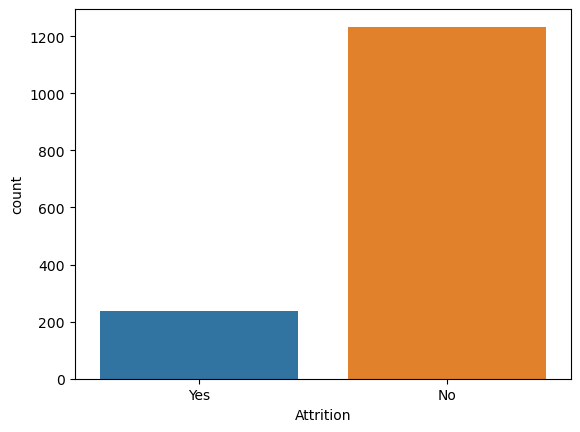

In [14]:
sns.countplot(data=emp,x="Attrition")

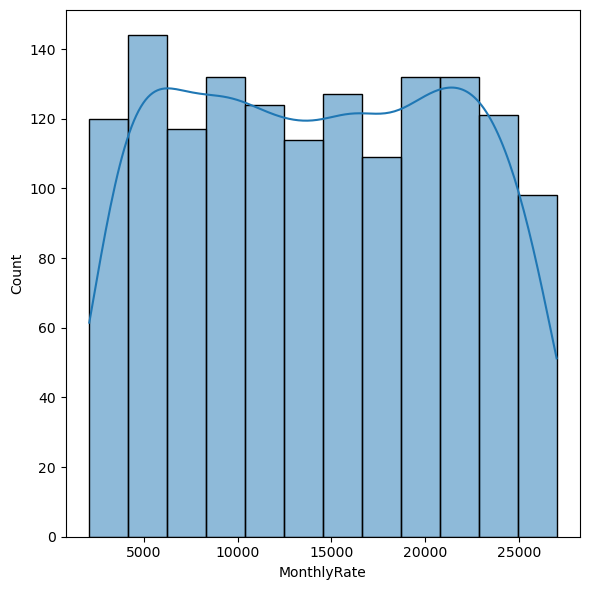

In [15]:
plt.figure(figsize=(6,6))
sns.histplot(data=emp, x=emp["MonthlyRate"],kde=True)
plt.tight_layout()
plt.show()

In [16]:
labels=emp["Attrition"].value_counts().index.tolist()
labels

['No', 'Yes']

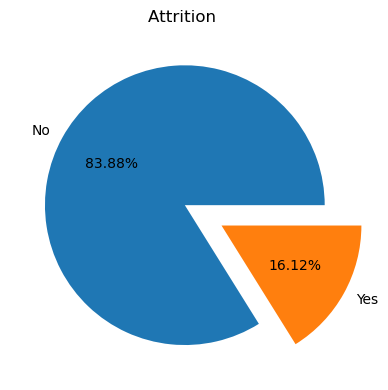

In [17]:
plt.figure(figsize=(4,4))
plt.pie(x=emp["Attrition"].value_counts(), labels=labels,autopct="%1.2f%%", explode=[0,0.3])
plt.title("Attrition ")
plt.tight_layout()
plt.show()

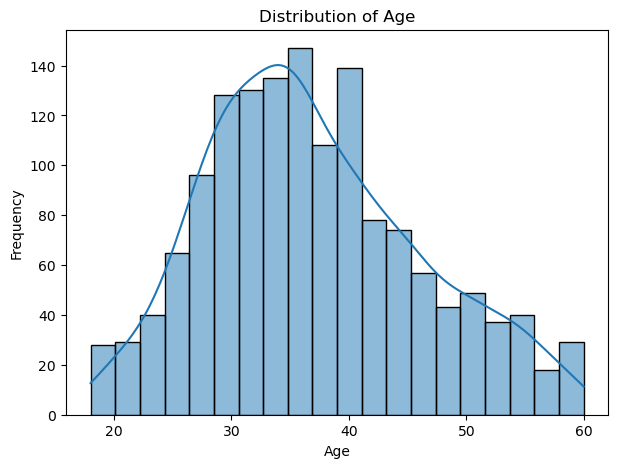

In [18]:
plt.figure(figsize=(7, 5))
sns.histplot(emp['Age'], bins=20, kde=True)
plt.title('Distribution of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

In [19]:
labels=emp["OverTime"].value_counts().index.tolist()
labels

['No', 'Yes']

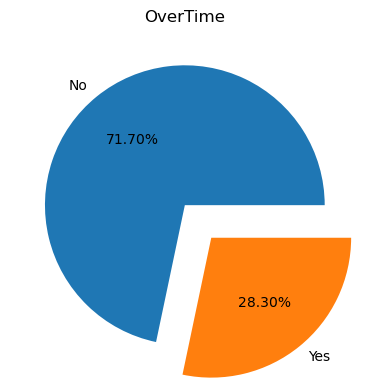

In [20]:
plt.figure(figsize=(4,4))
plt.pie(x=emp["OverTime"].value_counts(), labels=labels,autopct="%1.2f%%", explode=[0,0.3])
plt.title("OverTime")
plt.tight_layout()
plt.show()

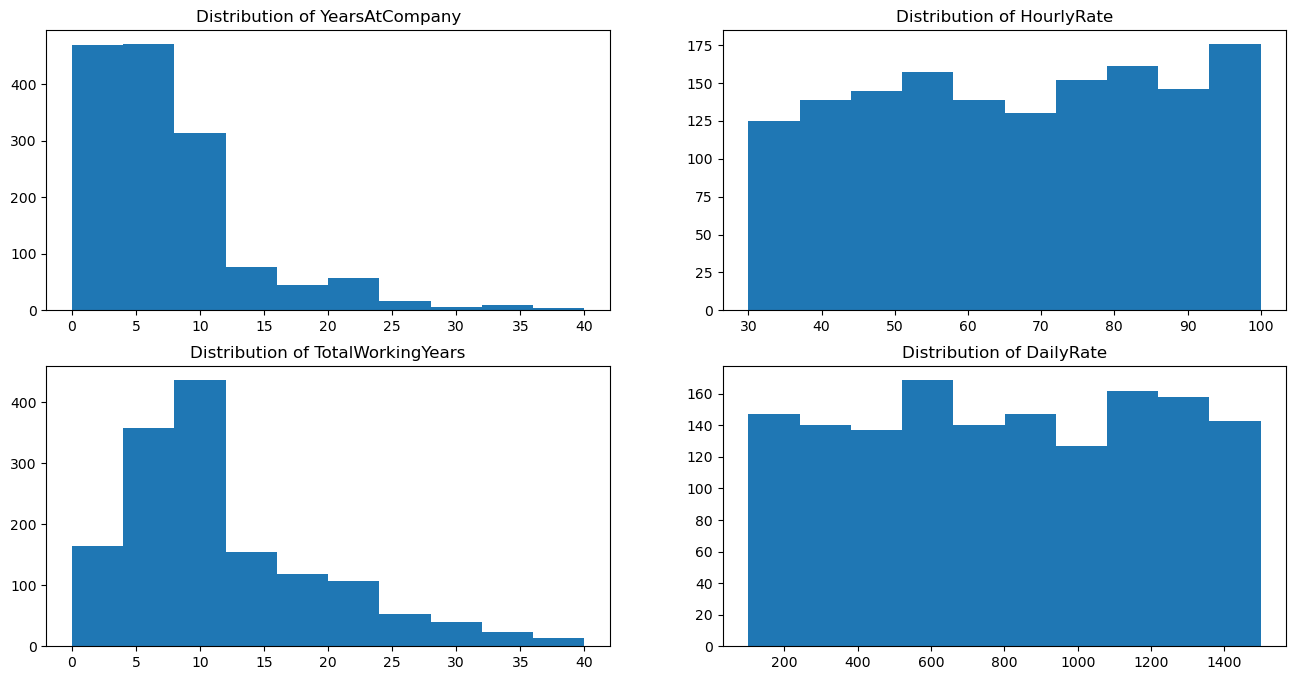

In [21]:
fig, axes = plt.subplots(2, 2, figsize=(16, 8))

axes[0,0].set_title("Distribution of YearsAtCompany")
axes[0,0].hist(emp["YearsAtCompany"]);

axes[0,1].set_title("Distribution of HourlyRate")
axes[0,1].hist(emp["HourlyRate"]);

axes[1,0].set_title("Distribution of TotalWorkingYears")
axes[1,0].hist(emp["TotalWorkingYears"]);

axes[1,1].set_title("Distribution of DailyRate")
axes[1,1].hist(emp["DailyRate"]);

Text(0.5, 1.0, 'JobInvolvement vs MonthlyIncome')

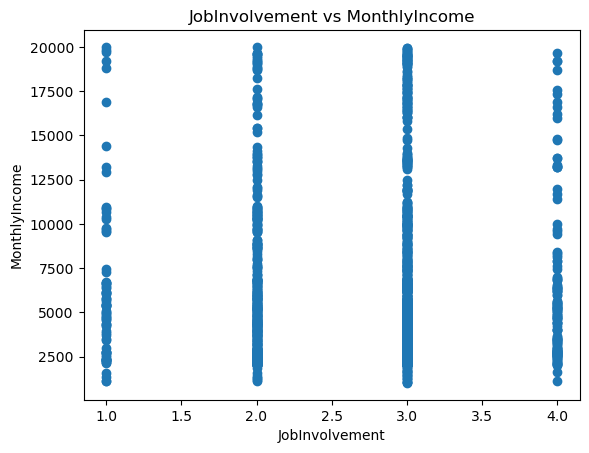

In [22]:
plt.scatter(emp.JobInvolvement,emp.MonthlyIncome)
plt.xlabel("JobInvolvement")
plt.ylabel("MonthlyIncome")
plt.title("JobInvolvement vs MonthlyIncome")

Job Involvement

In [23]:
emp["StandardHours"].value_counts()

80    1470
Name: StandardHours, dtype: int64

In [24]:
labels=emp["StandardHours"].value_counts().index.tolist()
labels

[80]

In [25]:
emp["JobRole"].unique()

array(['Sales Executive', 'Research Scientist', 'Laboratory Technician',
       'Manufacturing Director', 'Healthcare Representative', 'Manager',
       'Sales Representative', 'Research Director', 'Human Resources'],
      dtype=object)

In [26]:
emp["JobRole"].value_counts()

Sales Executive              326
Research Scientist           292
Laboratory Technician        259
Manufacturing Director       145
Healthcare Representative    131
Manager                      102
Sales Representative          83
Research Director             80
Human Resources               52
Name: JobRole, dtype: int64

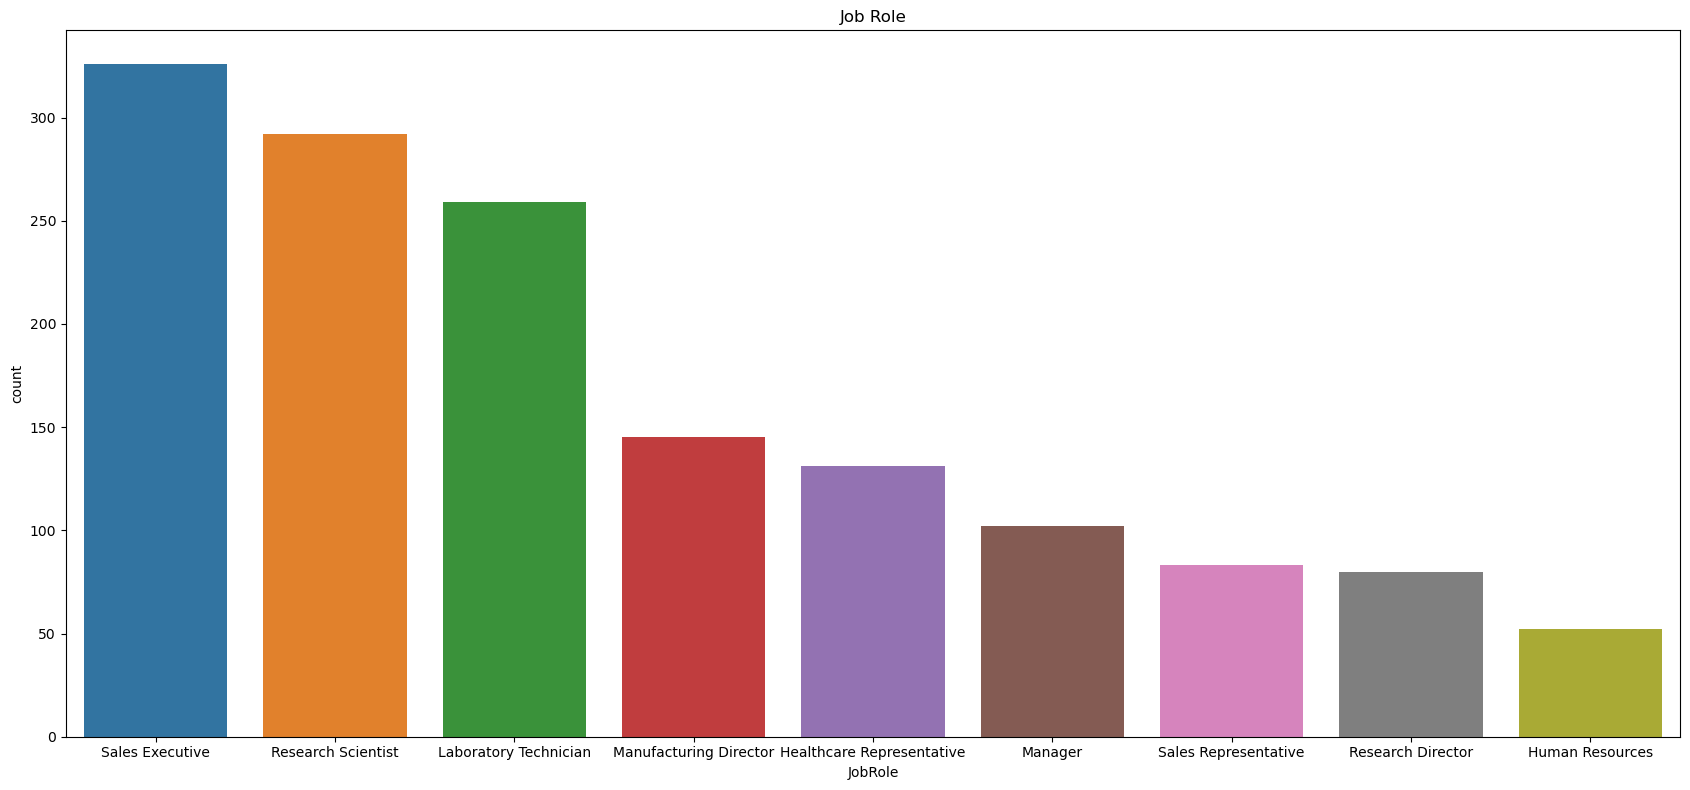

In [27]:
plt.figure(figsize=(17,8))
sns.countplot(x="JobRole", data=emp)
plt.title("Job Role")
plt.tight_layout()
plt.show()

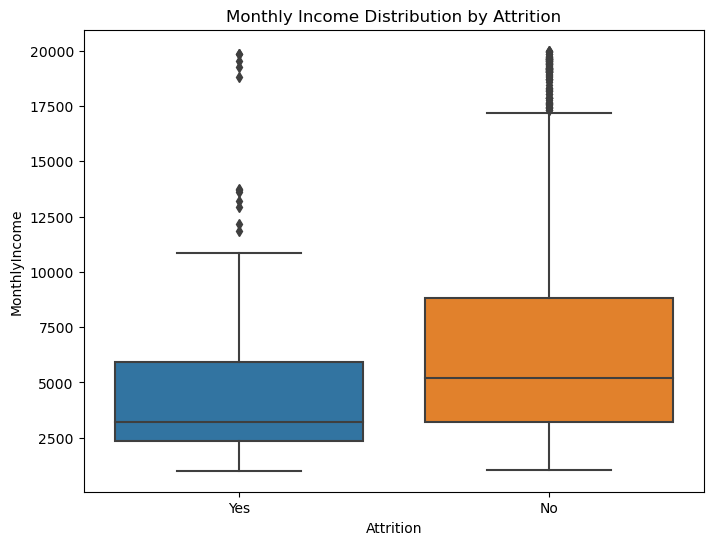

In [28]:
plt.figure(figsize=(8,6))
sns.boxplot(x='Attrition',y='MonthlyIncome',data=emp)
plt.title('Monthly Income Distribution by Attrition')
plt.show()

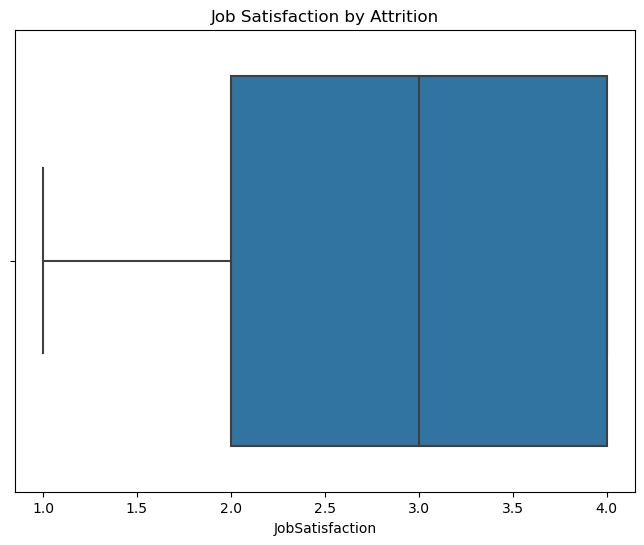

In [29]:
plt.figure(figsize=(8,6))
sns.boxplot(x='JobSatisfaction' ,hue='Attrition',data=emp)
plt.title('Job Satisfaction by Attrition')
plt.show()

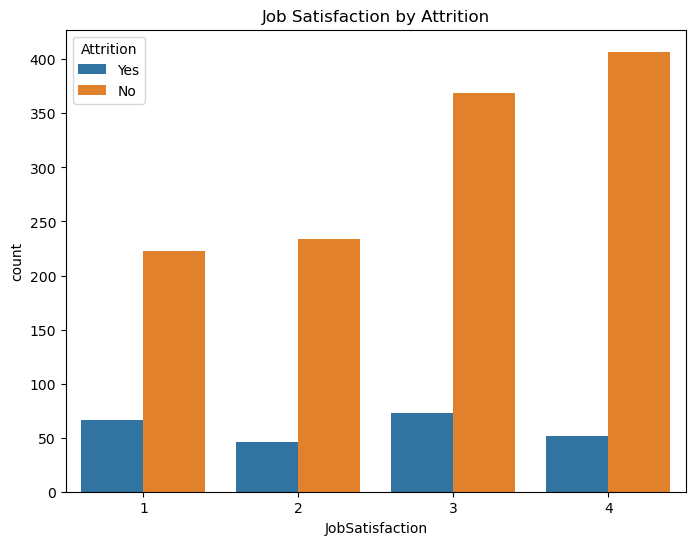

In [30]:
plt.figure(figsize=(8,6))
sns.countplot(x='JobSatisfaction' ,hue='Attrition',data=emp)
plt.title('Job Satisfaction by Attrition')
plt.show()

In [31]:
emp.drop(["EmployeeCount","EmployeeNumber","Over18","StandardHours"],axis="columns",inplace=True)
categorical_col=[]
for column in emp.columns:
    if emp[column].dtype==object and len(emp[column].unique())<=50:
        categorical_col.append(column)
emp["Attrition"]=emp.Attrition.astype("category").cat.codes

In [32]:
categorical_col.remove("Attrition")

Transform categorical data into dummies

In [33]:
emp1 = pd.get_dummies(emp,columns=categorical_col)
emp1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 50 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Age                                1470 non-null   int64
 1   Attrition                          1470 non-null   int8 
 2   DailyRate                          1470 non-null   int64
 3   Department                         1470 non-null   int32
 4   DistanceFromHome                   1470 non-null   int64
 5   Education                          1470 non-null   int64
 6   EnvironmentSatisfaction            1470 non-null   int64
 7   HourlyRate                         1470 non-null   int64
 8   JobInvolvement                     1470 non-null   int64
 9   JobLevel                           1470 non-null   int64
 10  JobSatisfaction                    1470 non-null   int64
 11  MonthlyIncome                      1470 non-null   int64
 12  MonthlyRate         

In [34]:
from sklearn.preprocessing import LabelEncoder
l1=LabelEncoder()
for column in categorical_col:
    emp[column]=l1.fit_transform(emp[column])

In [35]:
from sklearn.model_selection import train_test_split

X = emp.drop('Attrition',axis=1)
y = emp.Attrition

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [36]:
from sklearn.tree import DecisionTreeClassifier
d1=DecisionTreeClassifier(random_state=10)
d1.fit(X_train,y_train)

DecisionTreeClassifier(random_state=10)

In [37]:
y_pred=d1.predict(X_test)
y_pred

array([0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,

In [38]:
from sklearn.metrics import accuracy_score
ac=accuracy_score(y_pred,y_test)*100
print("Using decision tree accuracy is:",ac,"%")

Using decision tree accuracy is: 79.59183673469387 %
